In [14]:
import pandas as pd 
import numpy as np
from collections import Counter

In [4]:
trn = pd.read_csv('../data/train.csv', na_values=['-1','-1.0']) # -1, -1.0은 결측값을 의미
tst = pd.read_csv('../data/test.csv', na_values=['-1','-1.0'])
print(trn.shape)
print(tst.shape)

(595212, 59)
(892816, 58)


In [5]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

- _bin으로 끝나는 변수: 이진 변수
- _cat으로 끝나는 변수: 범주형 변수

## target values

In [13]:
trn['target'].unique()

array([0, 1], dtype=int64)

In [36]:
print('target 0:', len(trn[trn['target']==0])/len(trn) * 100)
print('target 1:', len(trn[trn['target']==1])/len(trn) * 100)

target 0: 96.3552482140817
target 1: 3.6447517859182947


- target 1 이 3.6% 비율밖에 차지 하지 않는 매우 불균형한 데이터

## Visualize

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

In [39]:
# 테스트 데이터의 target 변수를 결측값으로 설정 
tst['target'] = np.nan

# merge train & test data
df = pd.concat([trn, tst], axis=0)

C:\Users\nonam\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [45]:
# 히스토그램 그래프 시각화 함수
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()

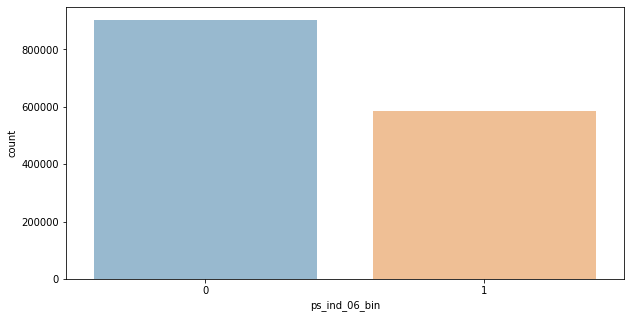

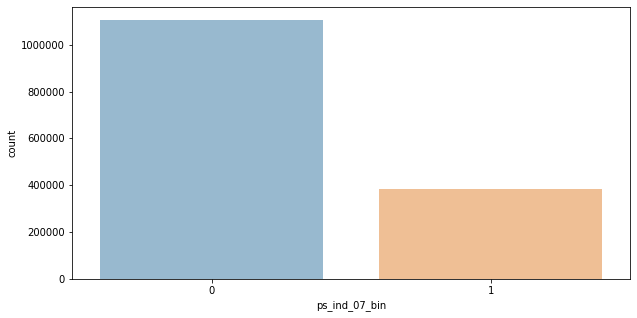

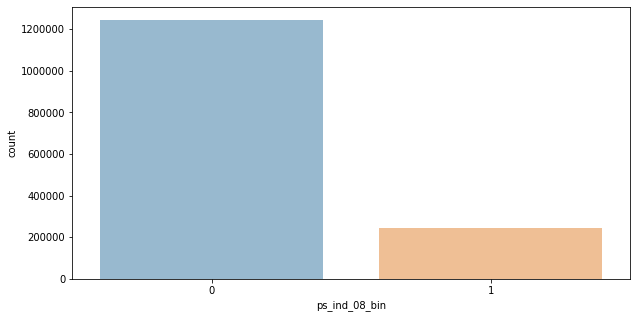

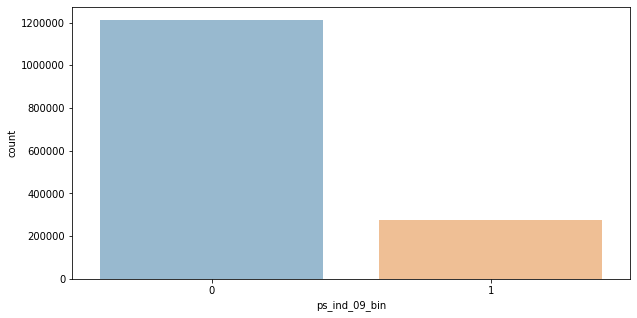

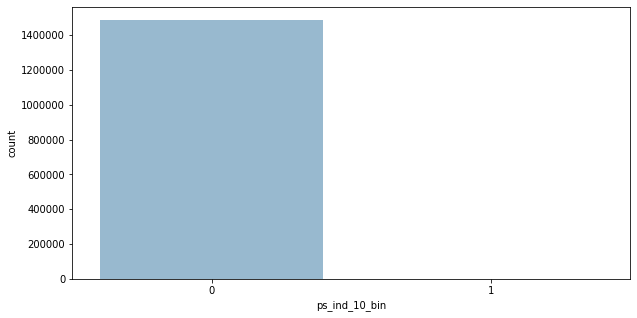

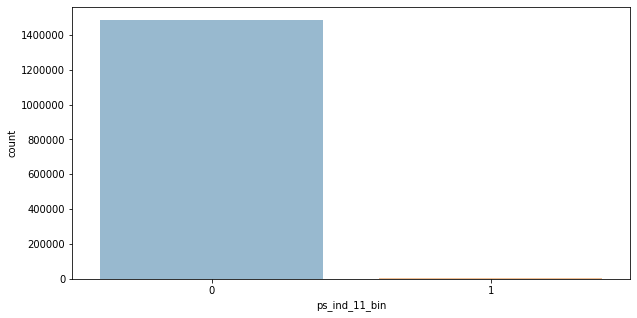

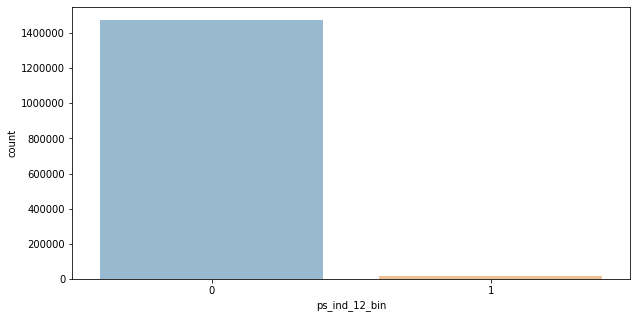

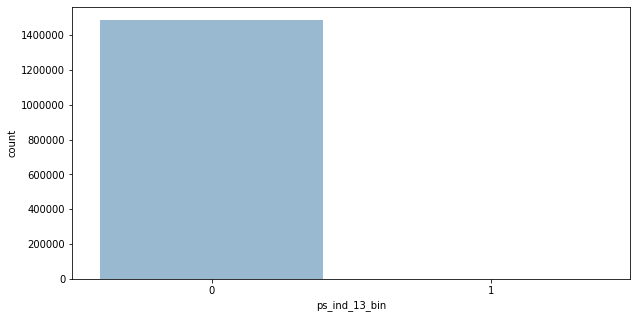

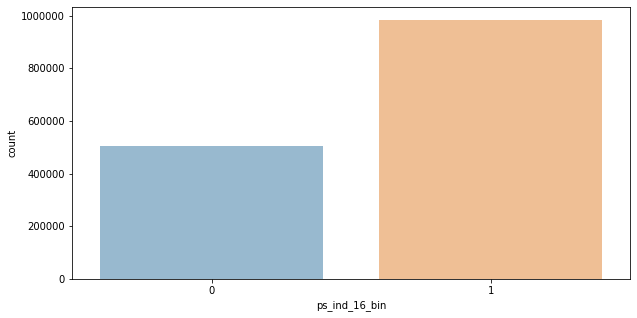

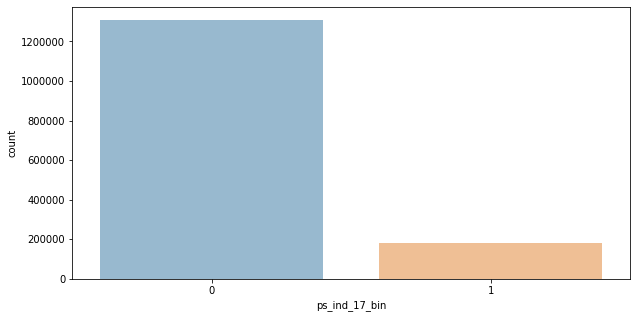

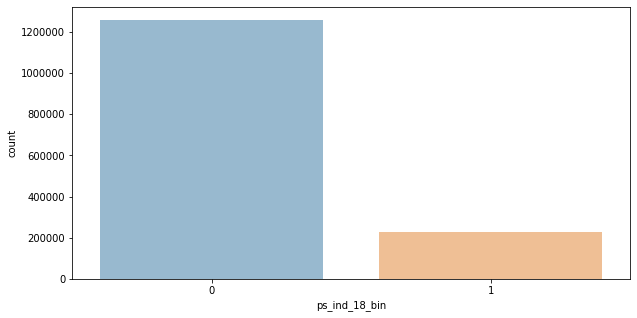

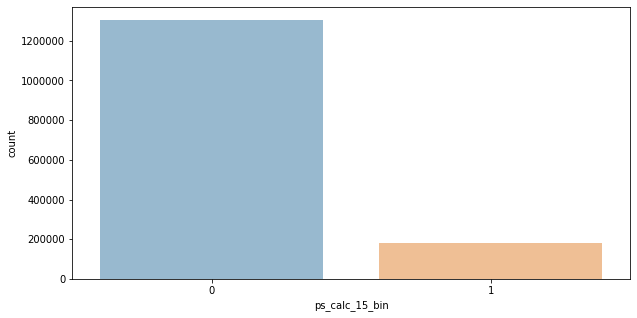

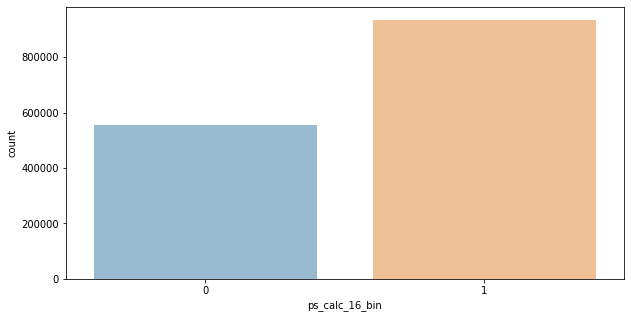

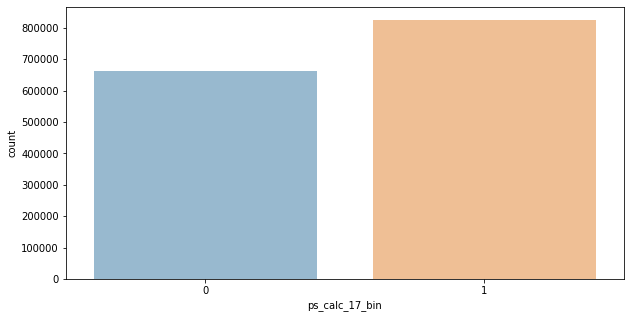

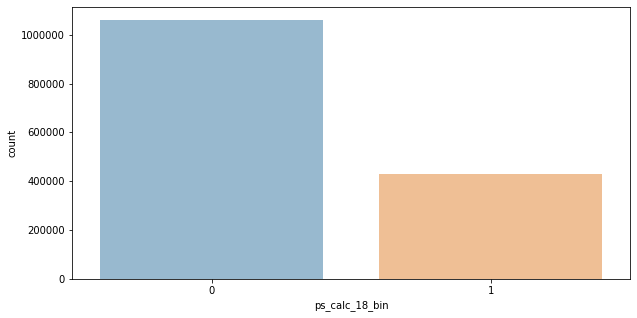

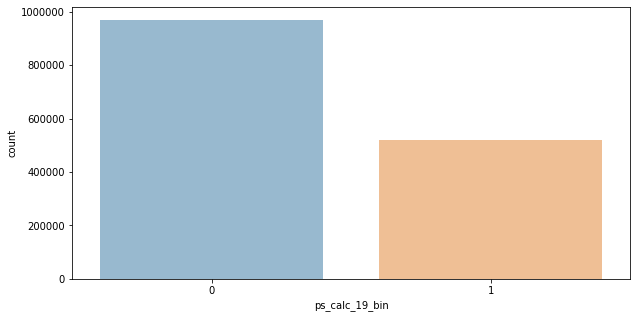

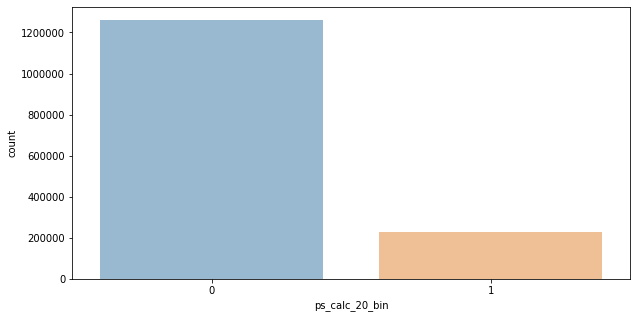

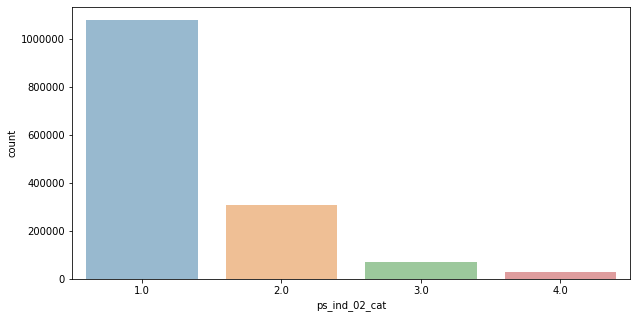

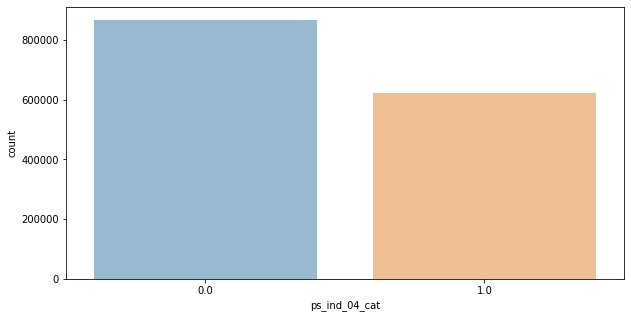

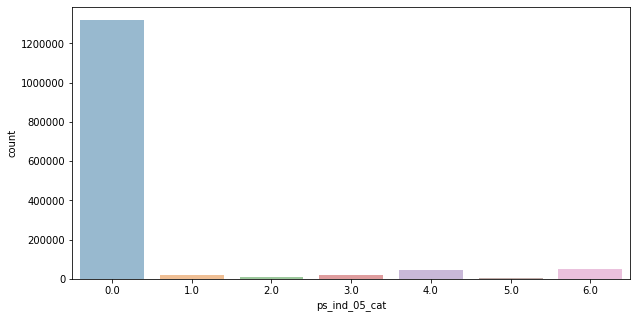

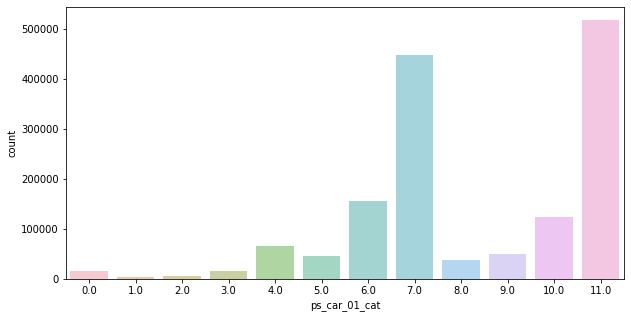

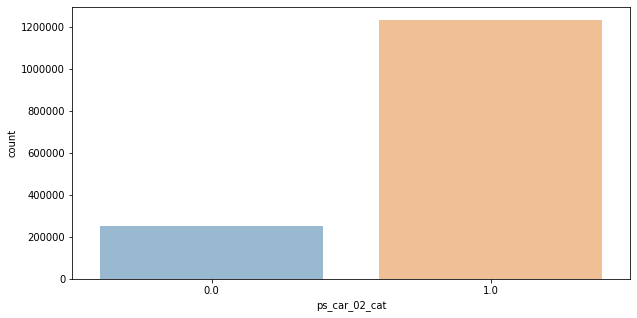

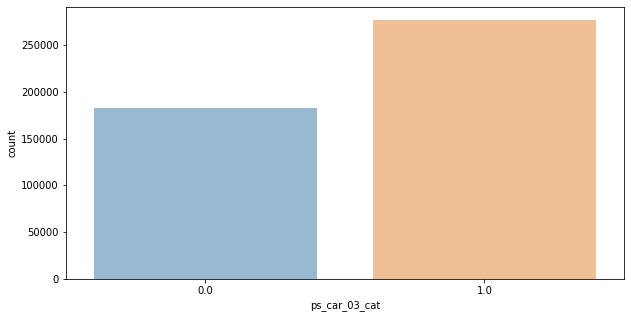

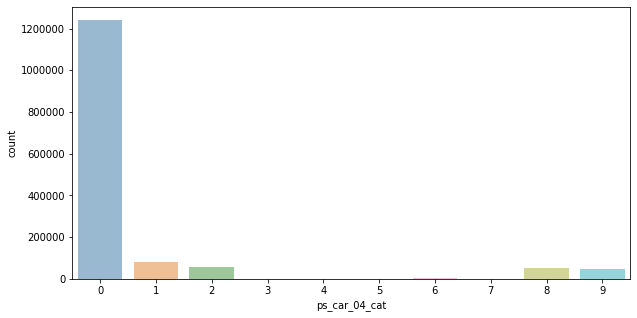

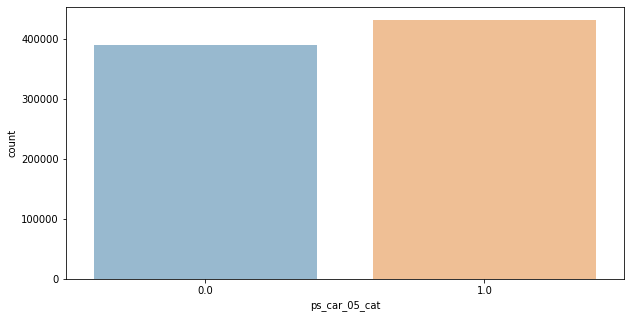

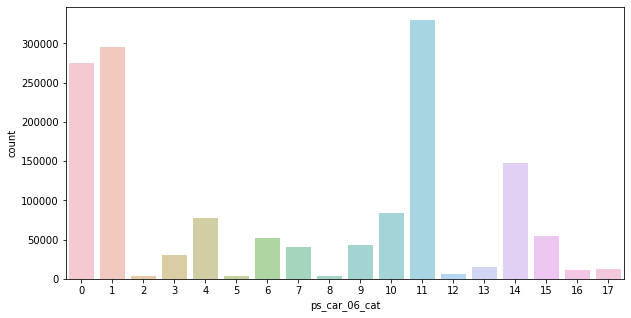

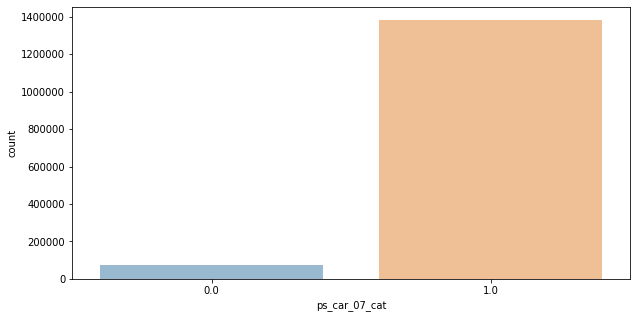

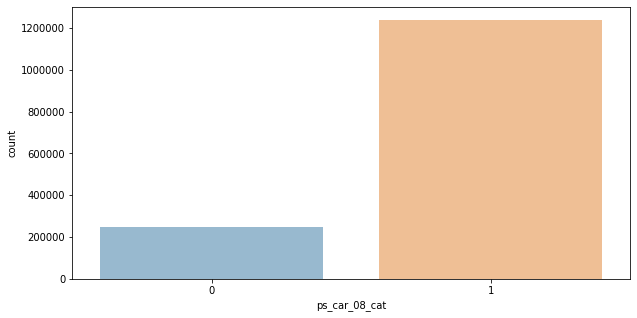

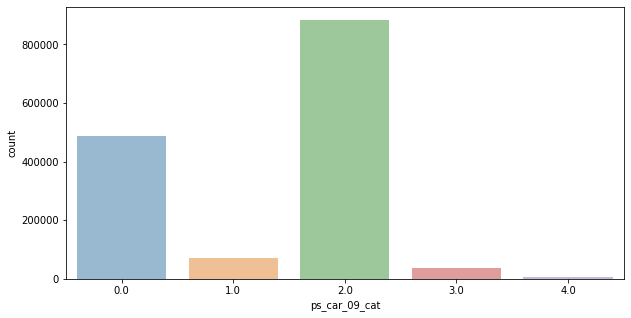

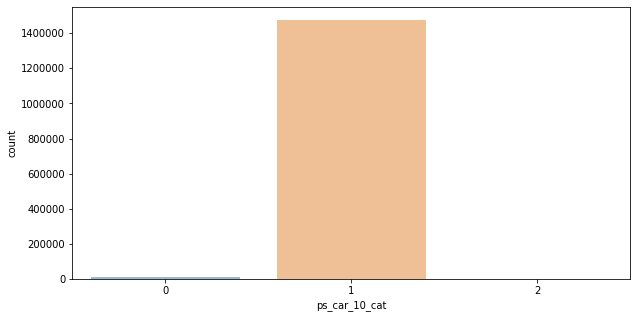

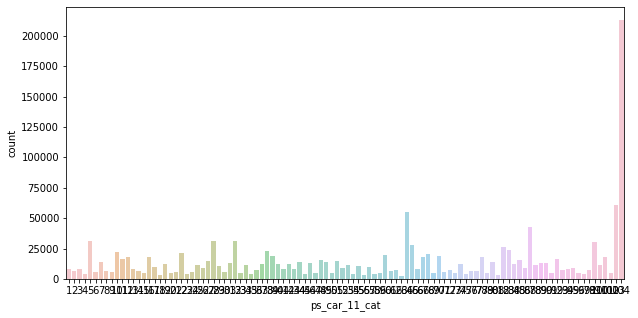

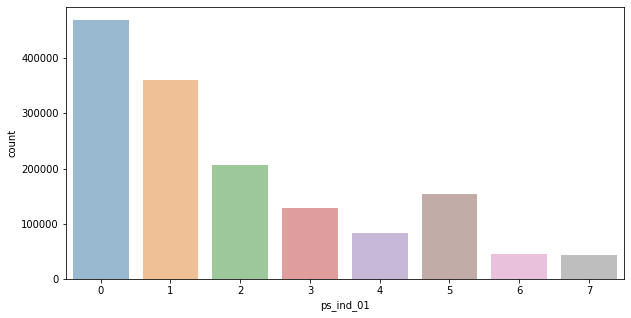

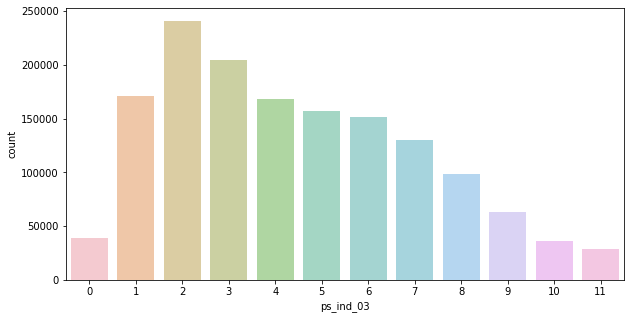

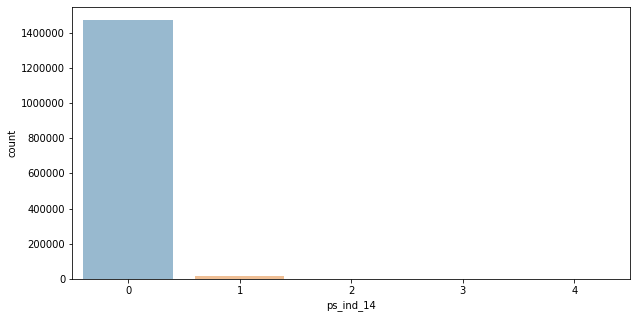

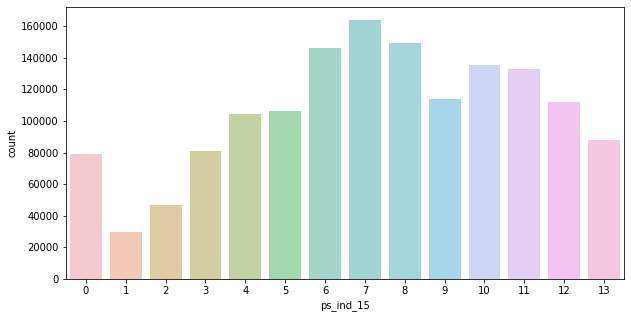

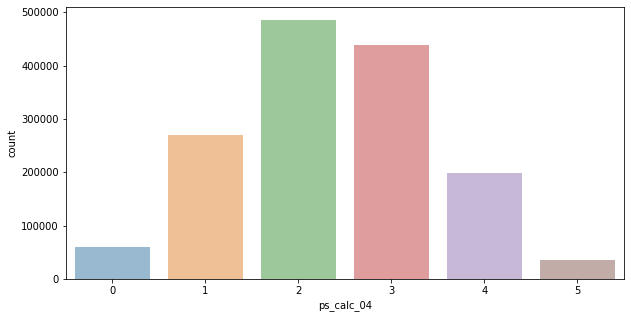

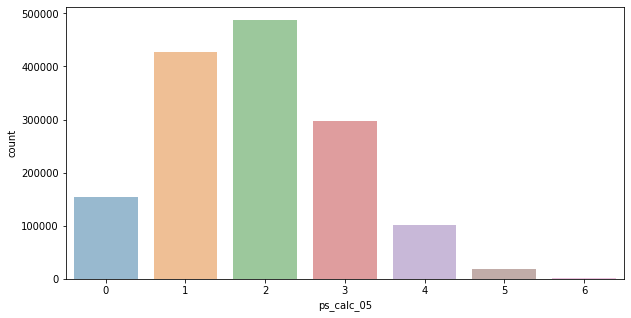

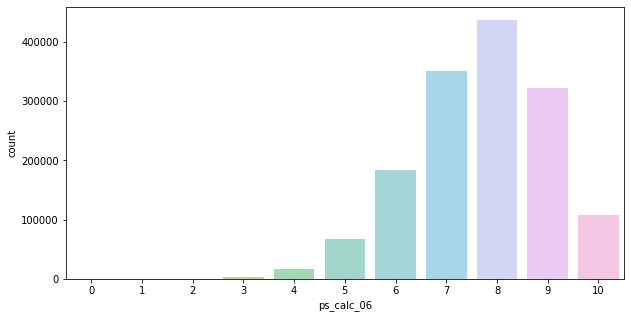

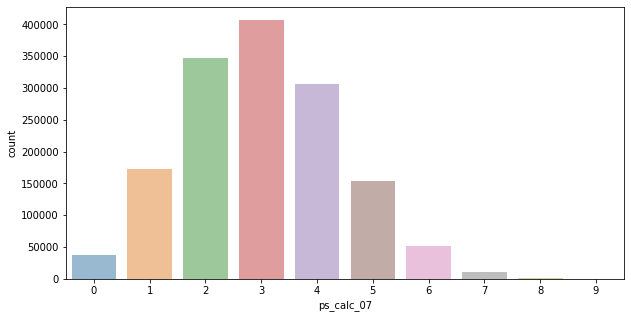

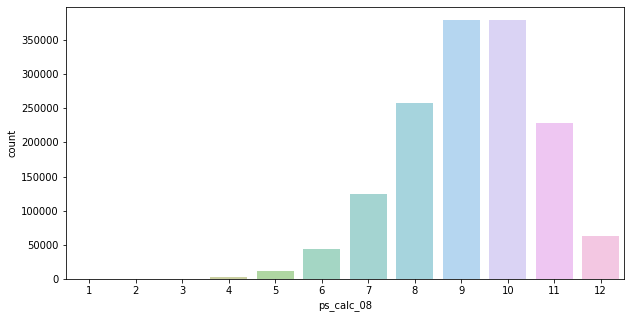

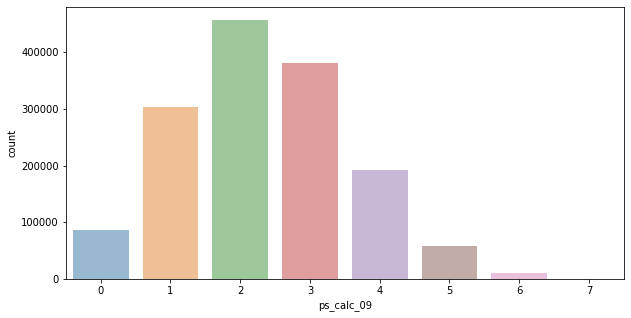

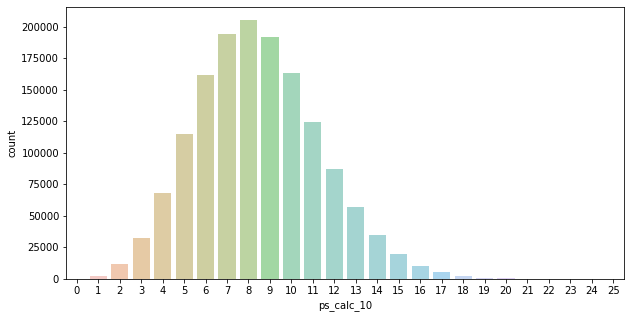

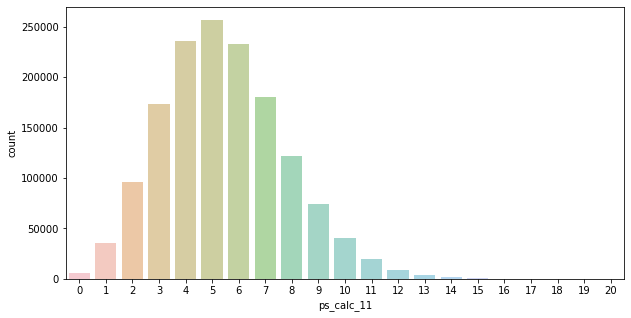

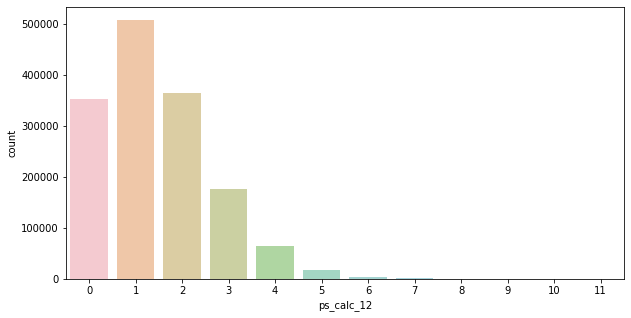

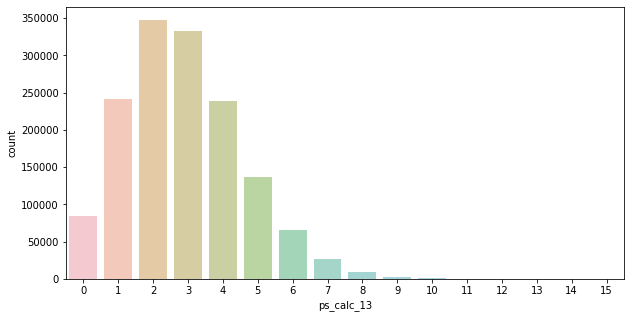

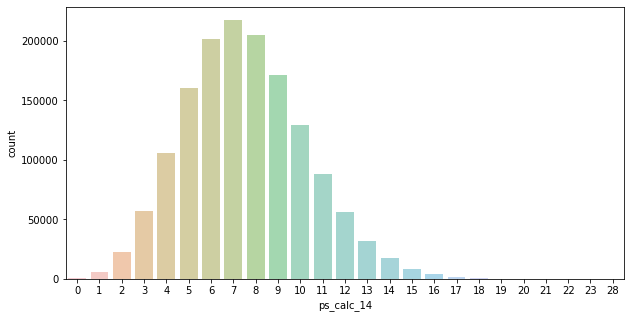

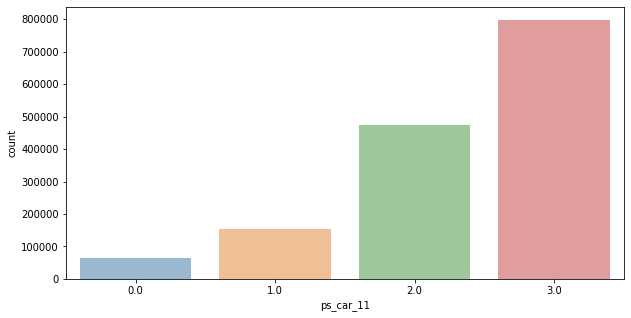

In [42]:
# 이진, 범주형, 정수형 변수 시각화
for col in binary+category+integer:
    bar_plot(col, df)

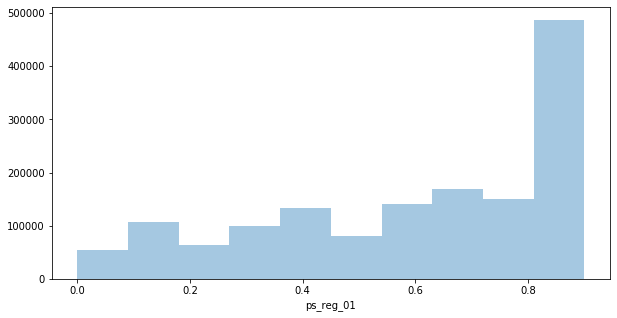

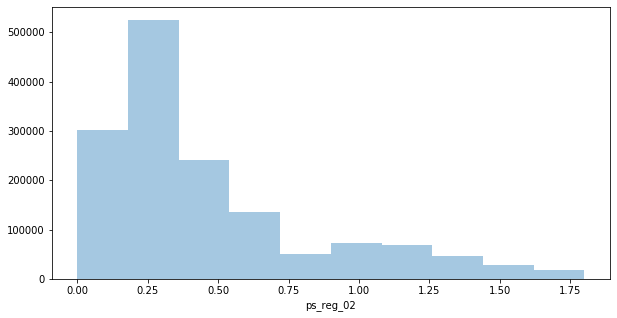

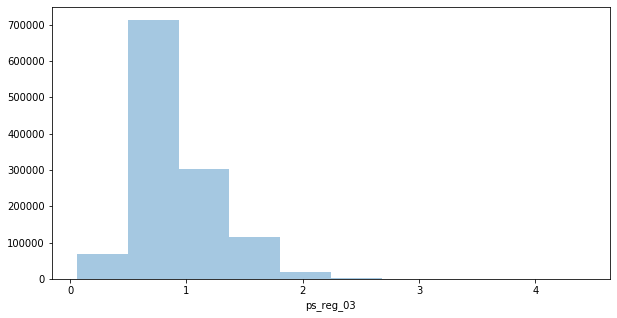

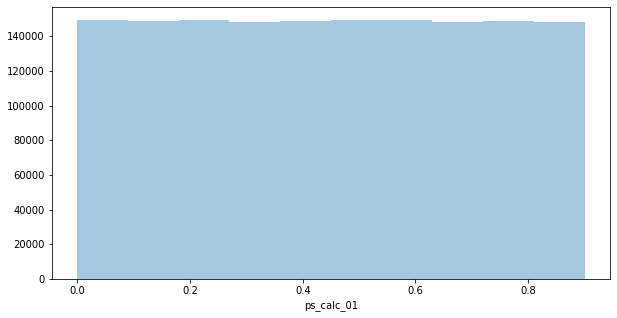

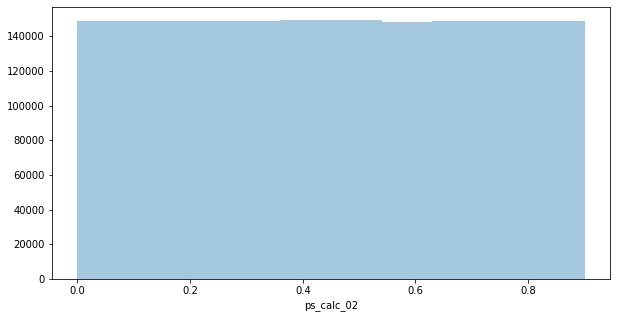

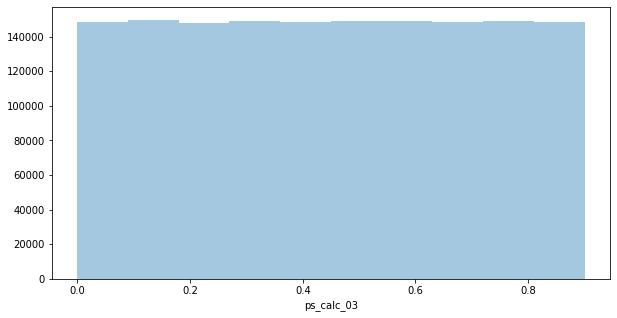

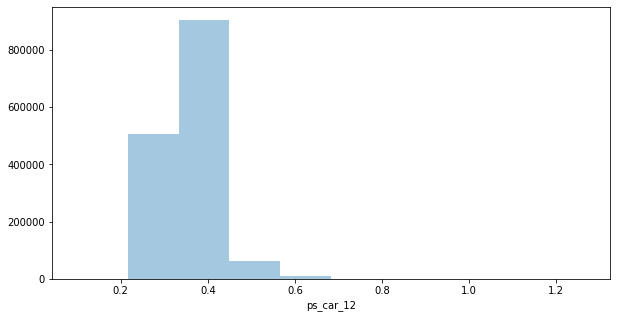

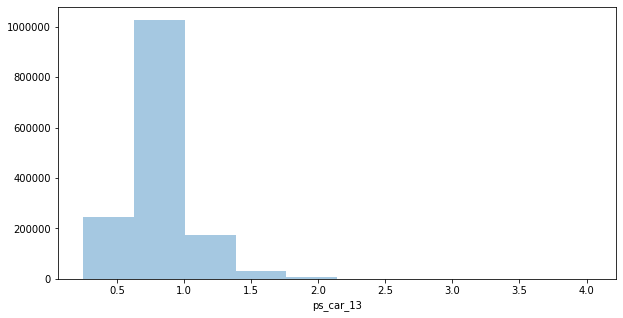

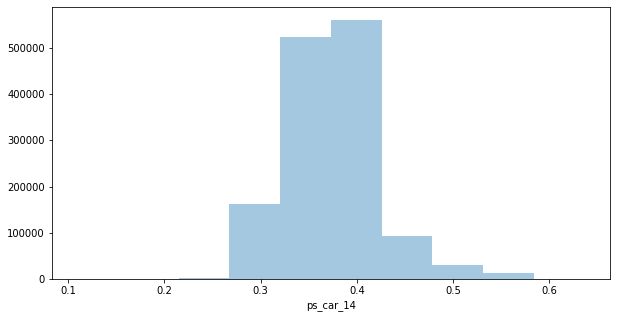

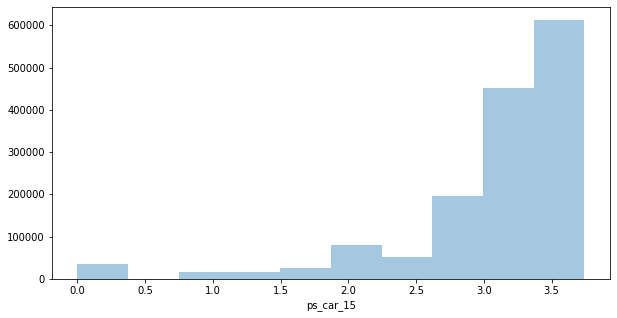

In [46]:
# 소수형 변수 시각화
for col in floats:
    dist_plot(col, df)

## Corrleation

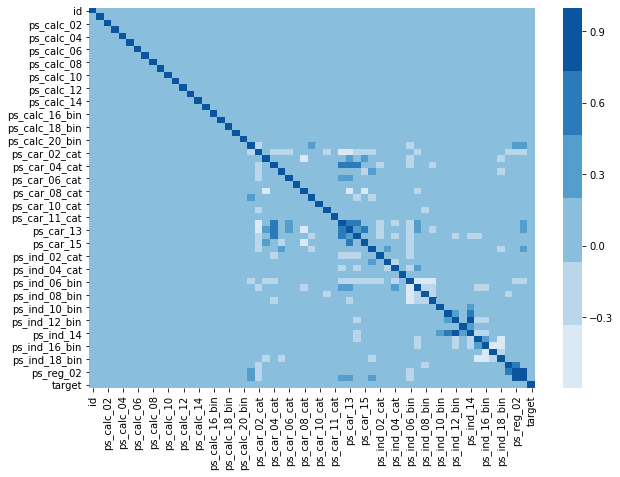

In [47]:
corr = df.corr()

cmap = sns.color_palette('Blues')
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

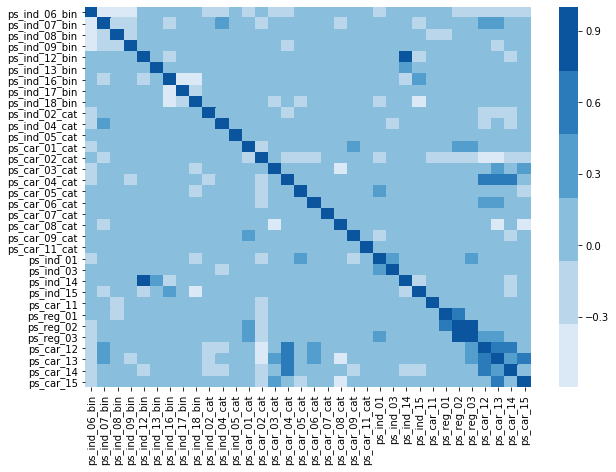

In [48]:
# 일부 변수 
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

- 일반적으로 상관관계가 0.95 이상일 경우 하나의 변수를 제거 하지만 이번 데이터에서는 최고가 0.89수준의 상관관계이기에 제거하지않고 진행

In [51]:
# 단일 변수 고유값별로 타겟 변수 비율 시각화
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()

In [ ]:
for col in binary+category+integer:
    bar_plot_ci(col, df)